In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('files/summer.csv')

In [3]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [13]:
data_medCou = data.groupby(['Country','Medal'])

In [14]:
summary_meCou = data_medCou['Medal'].count()

In [15]:
summary_meCou

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [16]:
summary_meCou.index

MultiIndex([('AFG', 'Bronze'),
            ('AHO', 'Silver'),
            ('ALG', 'Bronze'),
            ('ALG',   'Gold'),
            ('ALG', 'Silver'),
            ('ANZ', 'Bronze'),
            ('ANZ',   'Gold'),
            ('ANZ', 'Silver'),
            ('ARG', 'Bronze'),
            ('ARG',   'Gold'),
            ...
            ('YUG',   'Gold'),
            ('YUG', 'Silver'),
            ('ZAM', 'Bronze'),
            ('ZAM', 'Silver'),
            ('ZIM', 'Bronze'),
            ('ZIM',   'Gold'),
            ('ZIM', 'Silver'),
            ('ZZX', 'Bronze'),
            ('ZZX',   'Gold'),
            ('ZZX', 'Silver')],
           names=['Country', 'Medal'], length=347)

In [18]:
summary_meCou.loc[('ALG','Gold')]

5

In [19]:
summary_meCou.shape

(347,)

In [20]:
##unstack

In [21]:
summary_meCou.unstack()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [25]:
summary_meCou.unstack(level=-1)

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [26]:
new_summary = summary_meCou.unstack(level=-1,fill_value=0)

In [27]:
new_summary.head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99


In [28]:
new_summary.shape

(147, 3)

In [29]:
new_summary = new_summary[['Gold','Silver','Bronze']]

In [30]:
new_summary.head()

Medal,Gold,Silver,Bronze
Country,,,
AFG,0,0,2
AHO,0,1,0
ALG,5,2,8
ANZ,20,4,5
ARG,69,99,91


In [32]:
new_summary.sort_values(by=['Gold','Silver','Bronze'],ascending=[False,False,False],inplace=True)

In [33]:
new_summary.head(20)

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

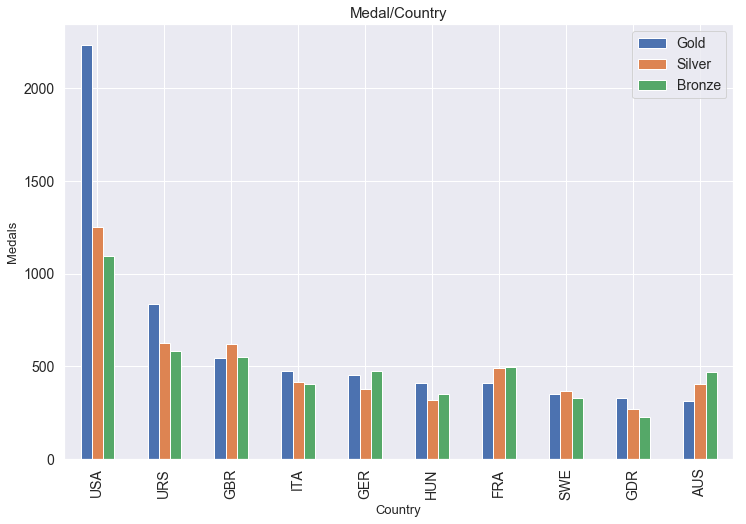

In [37]:
new_summary.head(10).plot(kind='bar',figsize=(12,8),fontsize=14)
plt.xlabel('Country',fontsize=13)
plt.ylabel('Medals',fontsize=13)
plt.title('Medal/Country',fontsize=15)
plt.legend(fontsize=14)
plt.show()

In [38]:
#stack

In [39]:
new_summary

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1


In [40]:
new_summary.stack()

Country  Medal 
USA      Gold      2235
         Silver    1252
         Bronze    1098
URS      Gold       838
         Silver     627
                   ... 
NIG      Silver       0
         Bronze       1
TOG      Gold         0
         Silver       0
         Bronze       1
Length: 441, dtype: int64

In [41]:
new_summary.stack().unstack()

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1
